In [108]:
# Import modules
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

shopping = pd.read_csv("/dataset/customer_shopping_data.csv")



In [109]:
shopping['invoice_date'] = pd.to_datetime(shopping['invoice_date'], format = '%d/%m/%Y')

In [110]:
shopping.describe()

,age,quantity,price,invoice_date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00
std,14.990054,1.413025,941.184567,NaN


In [111]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [121]:
shopping.assign(
    year = shopping['invoice_date'].dt.year,
    month = shopping['invoice_date'].dt.month
)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,AgeRange,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,18-30,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-30,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,18-30,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,57+,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,44-56,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,44-56,2022,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,18-30,2021,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,57+,2021,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,44-56,2021,3


<Axes: xlabel='invoice_date'>

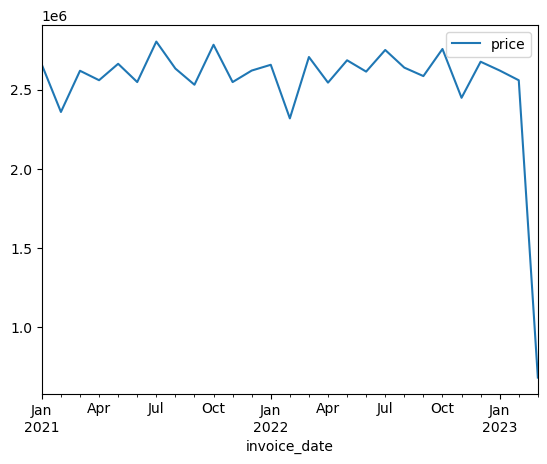

In [128]:
invoice_date=shopping[['invoice_date','price']].set_index('invoice_date')
invoice_date.resample('M').sum().plot()

In [113]:
shopping.groupby("age")['customer_id'].nunique()
bins = [30, 43, 56, np.inf]
names = np.array(['18-30', '31-43','44-56','57+'])
shopping['AgeRange']= names[np.searchsorted(bins, shopping['age']-1)]
shopping_age = shopping.groupby('AgeRange')['price'].sum().reset_index()

Text(0.5, 1.0, 'Revenue by Age Range')

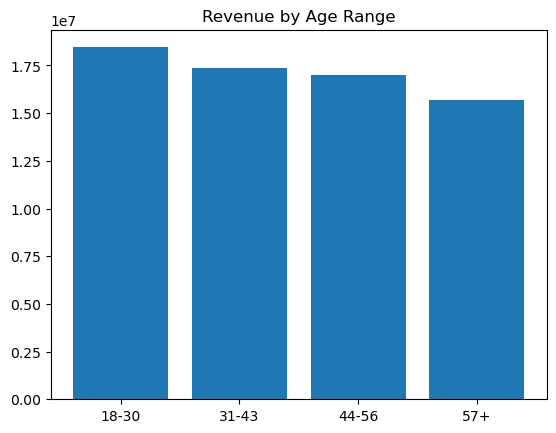

In [114]:
xbar = shopping_age['AgeRange'].to_list()
ybar = shopping_age['price'].to_list()
plt.bar(xbar, ybar)
plt.title('Revenue by Age Range')

Most purchased Category and their Revenue

In [115]:
shopping_category = shopping.groupby('category')['price'].sum().reset_index()
shopping_category

,category,price
0,Books,226977.30
1,Clothing,31075684.64
2,Cosmetics,1848606.90
3,Food & Beverage,231568.71
4,Shoes,18135336.89
5,Souvenir,174436.83
6,Technology,15772050.00
7,Toys,1086704.64


Text(0.5, 1.0, 'Highest revenue-generated Category')

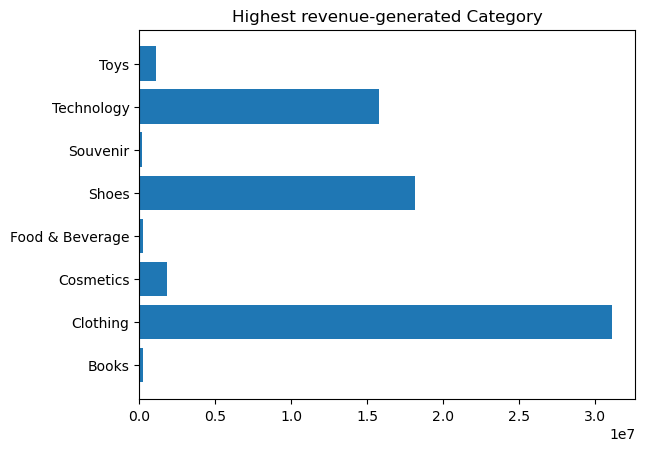

In [116]:
xbar = shopping_category['category'].to_list()
ybar = shopping_category['price'].to_list()
plt.barh(xbar,ybar)
plt.title('Highest revenue-generated Category')

In [117]:
shopping_shoppingmalls = shopping.groupby('shopping_mall')['customer_id'].nunique().sort_values(ascending=False)
shopping_shoppingmalls

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: customer_id, dtype: int64

Text(0.5, 1.0, 'Market share of Shopping malls')

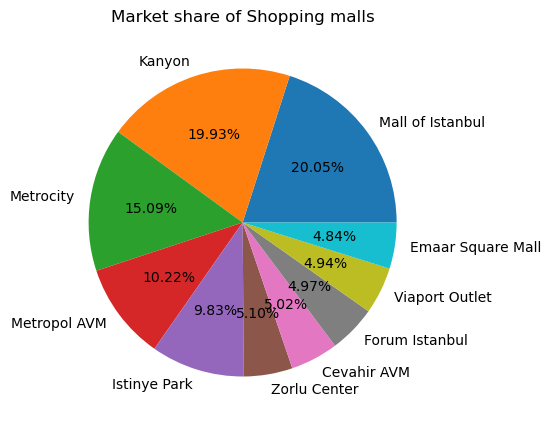

In [118]:
plt.figure(figsize=(7,5))
labels = shopping_shoppingmalls.index
plt.pie(shopping_shoppingmalls.values, labels=labels,autopct='%1.2F%%')
plt.title('Market share of Shopping malls')

(0.0, 25000.0)

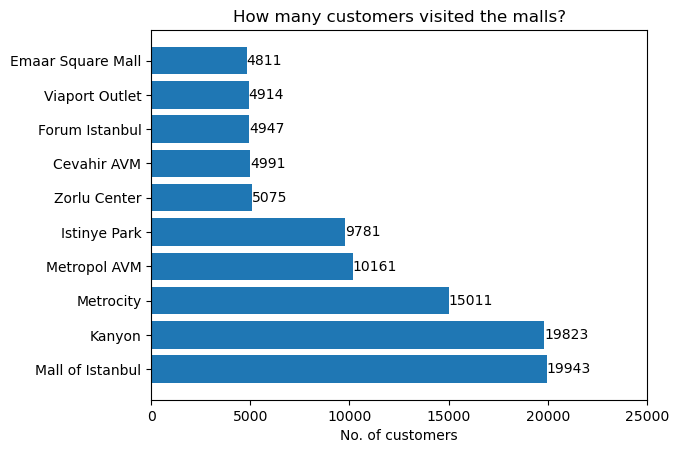

In [119]:
fig, ax = plt.subplots()
shopping_shoppingmalls=shopping_shoppingmalls.reset_index()
xbar = shopping_shoppingmalls['shopping_mall'].to_list()
ybar = shopping_shoppingmalls['customer_id'].to_list()
hbar = ax.barh(xbar, ybar, align='center')
ax.set_xlabel('No. of customers')
ax.set_title('How many customers visited the malls?')
ax.bar_label(hbar)
ax.set_xlim(right=25000)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import 

ImportError: cannot import name 'LinearRegression' from 'sklearn.model_selection' (c:\Users\ahron\ahron.anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\__init__.py)